In [126]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Members:
Adam Gordon 
2275253

Jaden Harris
2169997

Question 3


In [127]:
import numpy as np
import matplotlib.pyplot as plt


class KMC:
    def __init__(self, data, num_clusters):
        self.K = num_clusters
        self.max_epoch = 100
        self.centroids_s = np.zeros((self.K,  data.shape[1]))

    def init_centroids(self, data):
        centroids = np.zeros((self.K,  data.shape[1]))

        for k in range(self.K):
            centroid = data[np.random.choice(range(data.shape[0]))]
            centroids[k] = centroid

        return centroids


    def predict_cluster(self, clusters, data):
        y_pred = np.zeros(data.shape[0])

        for idx, cluster in enumerate(clusters):
            for i in cluster:
                y_pred[i] = idx

        return y_pred
    
    def convg(self,curr_centroids, prev_centroids):

        difference=curr_centroids-prev_centroids
        if not difference.any():
            return True
        else:
            return False
        

    def fit(self, data):
        centroids = self.init_centroids(data)

        count=0
        prev_centroids=np.zeros((self.K,  data.shape[1]))
        while count<self.max_epoch and not self.convg(centroids,prev_centroids):
            clusters = [[] for _ in range(self.K)]
            for idx, point in enumerate(data):
                closest_centroid = np.argmin(np.sqrt(np.sum((point - centroids) ** 2, axis=1)))
                clusters[closest_centroid].append(idx)

            prev_centroids = centroids
            
            centroids = np.zeros((self.K,  data.shape[1]))
            for idx, cluster in enumerate(clusters):
                new_centroid = np.mean(data[cluster], axis=0)
                centroids[idx] = new_centroid

            self.centroids_s=centroids
            count+=1

        y_pred = self.predict_cluster(clusters, data)

        return y_pred
    
    def cent(self):
     return self.centroids_s



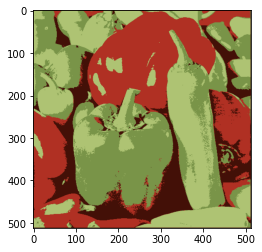

In [128]:
#image 1 4 clusters 
num_clusters = 4

image_peppers=img.imread("./peppers.bmp")
image_peppers_pixels=image_peppers.reshape(-1,3)

K = KMC(image_peppers_pixels, num_clusters)
y_pred = K.fit(image_peppers_pixels)
centers = np.uint8(K.cent())

y_pred = y_pred.astype(int)
np.unique(y_pred)

labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_peppers.shape)  

plt.imshow(segmented_image)
plt.show()

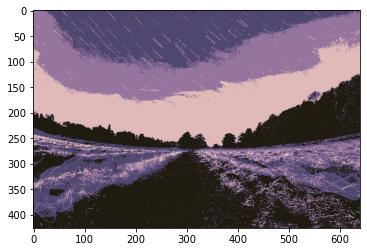

In [129]:
#image 2 4 clusters 
num_clusters = 4
image_2=img.imread("./pic2.bmp")
image_2_pixels=image_2.reshape(-1,3)

K = KMC(image_2_pixels, num_clusters)
y_pred = K.fit(image_2_pixels)
centers = np.uint8(K.cent())

y_pred = y_pred.astype(int)
np.unique(y_pred)

labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_2.shape)  

plt.imshow(segmented_image)
plt.show()

Question 3D
I notice that the amount of colours and thus the image quiality gets closer and closer to the original